<a href="https://colab.research.google.com/gist/phukaokub/a21c419e6a40b6f097bfdfbc589b70ce/css324f23_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSS324 Homework Assignment 2

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

## Group Members
1. Teerawat Chuaphanngam 6422780054


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR10 dataset
(x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y, y_test = y.flatten(), y_test.flatten()
x = x / 255
x_test = x_test / 255

170498071/170498071 [==============================] - 4s 0us/step


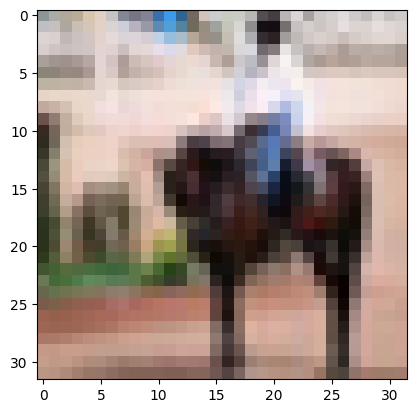

Class= 7


In [ ]:
# Plot a training example
plt.imshow(x[11, :, :, :])
plt.show()
print(f"Class= {y[11]}")        # 7 = horse

In [ ]:
# Split the training set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=11)
X_test = x_test

print("Shape of the datasets")
print("Training set   =", X_train.shape, y_train.shape)
print("Validation set =", X_valid.shape, y_valid.shape)
print("Test set       =", X_test.shape, y_test.shape)

Shape of the datasets
Training set   = (40000, 32, 32, 3) (40000,)
Validation set = (10000, 32, 32, 3) (10000,)
Test set       = (10000, 32, 32, 3) (10000,)


In [ ]:
# Use one-hot encoding for y
Y_train = tf.one_hot(y_train, 10)
Y_valid = tf.one_hot(y_valid, 10)
Y_test = tf.one_hot(y_test, 10)

## Task

Construct a deep neural network to classify images in the CIFAR10 dataset. You can choose the numbers of hidden nodes, appropriate activation functions, regularizers, or the structure of the network.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

**Contraints**
 - The number of weight layers must be less than or equal to 6.
 - The number of training epochs must be set to 50.
 - Your model must achieve the test accuracy of at least 60%.

**Rules**
 - This is a group work. Each group can compose of up to three members.

In [ ]:
# Your implementation for Question 1
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

model = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(500, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

hist1 = model.fit(X_train, Y_train, batch_size=4096, validation_data=(X_valid, Y_valid), epochs=50)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np

# Assuming a function load_cifar10_data() for data loading

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=4096, validation_data=(X_valid, Y_valid), epochs=50)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

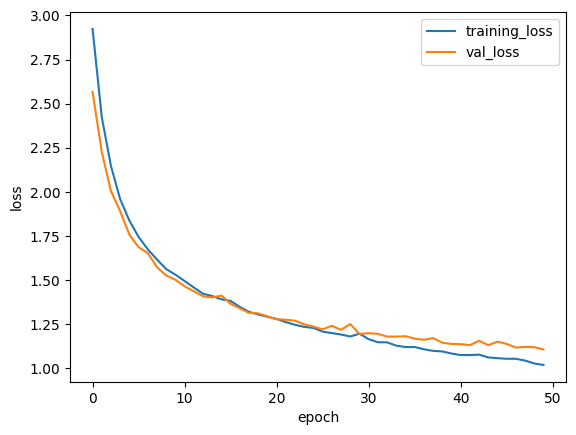

In [ ]:
# Plot the training loss and validation loss
N = len(history.history['loss'])
plt.plot(np.arange(N), history.history['loss'])
plt.plot(np.arange(N), history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'val_loss'], loc='upper right')
plt.show()

In [ ]:
res = model.evaluate(X_train, Y_train, verbose=0, batch_size=2048)
print(f"Training accuracy   = {res[1]:.4f}")
res = model.evaluate(X_valid, Y_valid, verbose=0, batch_size=2048)
print(f"Validation accuracy = {res[1]:.4f}")
res = model.evaluate(X_test, Y_test, verbose=0, batch_size=2048)
print(f"Test accuracy       = {res[1]:.4f}")

Training accuracy   = 0.7208
Validation accuracy = 0.6563
Test accuracy       = 0.6634
